# Table of contents
* [1 Initial Data Ceaning](#introduction)
    - [1.1 Import Data](#subparagraph1)
    - [1.2 Data Preview](#subparagraph1)
    - [1.3 Data Cleaning](#subparagraph1)
    - [1.4 Data Cleaning Final Sample](#subparagraph1)
* [2 Initial Data Exploration](#introduction)
    - [2.1 Summary](#subparagraph1)
    - [2.2 Total Deaths By Disease Every Year DataFrame](#subparagraph1)
    - [2.3 Total Deaths (1990-2019) DataFrame](#subparagraph1)
       - [2.3.1 Total Deaths (1990-2019) Visualization](#subparagraph2)
       - [2.3.2 Total Deaths (1990-2019) Percent Visualization](#subparagraph1)
       - [2.3.3 Choropleth Cardiovascular Diseases Visualization](#subparagraph1)
       - [2.3.4 Choropleth Neoplasms Visualization](#subparagraph1)
    - [2.4 Total Deaths Per Year DataFrame](#subparagraph1)
        - [2.4.1 Total Deaths Over Time Lineplot](#subparagraph1)
        - [2.4.2 Cardiovascular Deaths Over Time Lineplot](#subparagraph1)
    - [2.5 Countries Overall Death DataFrame](#subparagraph1)
        - [2.5.1 Total Deaths By Country Choropleth Visualization](#subparagraph1)


# Initial Data Cleaning <a name="introduction"></a>


### Import Data <a name="introduction"></a>

In [859]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [1741]:
df = pd.read_csv(r'C:\Users\coope\Documents\Tech\Data Analytics\Pandas\Causes_of_Death_Project\Causes Of Death.csv')
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 45)

### Data Preview <a name="paragraph1"></a>


In [1743]:
df.shape

(8254, 36)

In [1745]:
# Check overall table structure, null values, and column headers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [1747]:
df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,148.0,252.0,4995.0,7425.0,4990.0,27672.0,23890.0,111.0,296.0,9320.0,57.0,2488.0,1310.0,8220.0,3189.0,513.0,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,157.0,261.0,4790.0,7355.0,5020.0,25800.0,23792.0,114.0,1317.0,8275.0,57.0,2277.0,1330.0,6895.0,3261.0,495.0,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,167.0,270.0,4579.0,7290.0,5013.0,24340.0,23672.0,115.0,101.0,7359.0,57.0,2040.0,1342.0,7617.0,3336.0,483.0,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,184.0,292.0,4259.0,7432.0,4857.0,22883.0,23951.0,120.0,83.0,6412.0,58.0,1846.0,1391.0,9142.0,3550.0,483.0,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,191.0,305.0,4122.0,7494.0,4736.0,22162.0,24057.0,123.0,333.0,6008.0,103.0,1705.0,1413.0,11350.0,3682.0,482.0,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


### Data Cleaning <a name="paragraph1"></a>


In [1749]:
# Check for duplicates in this case there were none
df[df.duplicated()]

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)


In [1751]:
# Remove unnecessary info in the column headers
# Note all death columns are deaths for both sexes and all ages
df.columns = df.columns.str.replace(r' - Sex: Both - Age: All Ages \(Number\)', '', regex=True)

In [1753]:
df.head(10)

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,Deaths - Road injuries,Deaths - Maternal disorders,Deaths - Lower respiratory infections,Deaths - Neonatal disorders,Deaths - Alcohol use disorders,Deaths - Exposure to forces of nature,Deaths - Diarrheal diseases,Deaths - Environmental heat and cold exposure,Deaths - Nutritional deficiencies,Deaths - Self-harm,Deaths - Conflict and terrorism,Deaths - Diabetes mellitus,Deaths - Poisonings,Deaths - Protein-energy malnutrition,Terrorism (deaths),Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,148.0,252.0,4995.0,7425.0,4990.0,27672.0,23890.0,111.0,296.0,9320.0,57.0,2488.0,1310.0,8220.0,3189.0,513.0,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,157.0,261.0,4790.0,7355.0,5020.0,25800.0,23792.0,114.0,1317.0,8275.0,57.0,2277.0,1330.0,6895.0,3261.0,495.0,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,167.0,270.0,4579.0,7290.0,5013.0,24340.0,23672.0,115.0,101.0,7359.0,57.0,2040.0,1342.0,7617.0,3336.0,483.0,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,184.0,292.0,4259.0,7432.0,4857.0,22883.0,23951.0,120.0,83.0,6412.0,58.0,1846.0,1391.0,9142.0,3550.0,483.0,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,191.0,305.0,4122.0,7494.0,4736.0,22162.0,24057.0,123.0,333.0,6008.0,103.0,1705.0,1413.0,11350.0,3682.0,482.0,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
5,Afghanistan,AFG,2013,2,2281.0,18015.0,460.0,143.0,1777.0,4379.0,200.0,316.0,4047.0,8054.0,4623.0,22260.0,24234.0,126.0,155.0,5986.0,58.0,1690.0,1433.0,11829.0,3827.0,494.0,1651.0,3709.0,55274.0,4945.0,6859.0,3413.0,6476.0,2204.0,1581.0,491.0
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,213.0,326.0,3970.0,8087.0,4470.0,21750.0,24163.0,128.0,575.0,5751.0,57.0,1617.0,1444.0,18008.0,3986.0,496.0,1579.0,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,230.0,339.0,3893.0,7730.0,4320.0,21016.0,23953.0,131.0,446.0,5509.0,58.0,1505.0,1467.0,23667.0,4143.0,496.0,1469.0,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,251.0,354.0,3843.0,7866.0,4212.0,20601.0,23956.0,135.0,84.0,5376.0,58.0,1452.0,1505.0,28051.0,4349.0,504.0,1416.0,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0
9,Afghanistan,AFG,1990,NaN,2159.0,11580.0,323.0,93.0,1370.0,1538.0,34.0,93.0,4661.0,4154.0,2655.0,23741.0,15612.0,72.0,0.0,4235.0,175.0,2087.0,696.0,1490.0,2108.0,338.0,2054.0,12.0,44899.0,3709.0,5945.0,2673.0,5005.0,2985.0,1116.0,371.0


In [1755]:
# Some columns have null values for all the death counts in this case those rows will be dropped
# I also have converted all my death numbers to whole numbers since I shouldnt have any decimals for death counts
# Finally I renamed outlier column headers to match with the rest of the table
death_columns = df.filter(like='Deaths').columns

In [1757]:
df = df.dropna(subset=death_columns, how='all')

In [1759]:
df[death_columns] = df[death_columns].astype(int)

In [1761]:
df.head(222)

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,Deaths - Road injuries,Deaths - Maternal disorders,Deaths - Lower respiratory infections,Deaths - Neonatal disorders,Deaths - Alcohol use disorders,Deaths - Exposure to forces of nature,Deaths - Diarrheal diseases,Deaths - Environmental heat and cold exposure,Deaths - Nutritional deficiencies,Deaths - Self-harm,Deaths - Conflict and terrorism,Deaths - Diabetes mellitus,Deaths - Poisonings,Deaths - Protein-energy malnutrition,Terrorism (deaths),Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
0,Afghanistan,AFG,2007,15,2933,15925,481,393,2127,3657,148,252,4995,7425,4990,27672,23890,111,296,9320,57,2488,1310,8220,3189,513,2439,1199.0,53962,4490,7222,3346,6458,3437,1402,450
1,Afghanistan,AFG,2008,17,2731,16148,462,255,1973,3785,157,261,4790,7355,5020,25800,23792,114,1317,8275,57,2277,1330,6895,3261,495,2231,1092.0,54051,4534,7143,3316,6408,3005,1424,455
2,Afghanistan,AFG,2009,0,2460,16383,448,239,1852,3874,167,270,4579,7290,5013,24340,23672,115,101,7359,57,2040,1342,7617,3336,483,1998,1065.0,53964,4597,7045,3291,6358,2663,1449,460
3,Afghanistan,AFG,2011,2,2327,17094,448,390,1775,4170,184,292,4259,7432,4857,22883,23951,120,83,6412,58,1846,1391,9142,3550,483,1805,1525.0,54347,4785,6916,3318,6370,2365,1508,473
4,Afghanistan,AFG,2012,14,2254,17522,445,94,1716,4245,191,305,4122,7494,4736,22162,24057,123,333,6008,103,1705,1413,11350,3682,482,1667,3521.0,54868,4846,6878,3353,6398,2264,1544,482
5,Afghanistan,AFG,2013,2,2281,18015,460,143,1777,4379,200,316,4047,8054,4623,22260,24234,126,155,5986,58,1690,1433,11829,3827,494,1651,3709.0,55274,4945,6859,3413,6476,2204,1581,491
6,Afghanistan,AFG,2014,6,1935,18462,463,228,1757,4420,213,326,3970,8087,4470,21750,24163,128,575,5751,57,1617,1444,18008,3986,496,1579,5414.0,55932,5055,6851,3454,6522,2134,1620,502
7,Afghanistan,AFG,2015,1,1821,18876,463,284,1730,5039,230,339,3893,7730,4320,21016,23953,131,446,5509,58,1505,1467,23667,4143,496,1469,6216.0,56875,5153,6835,3492,6555,2065,1652,511
8,Afghanistan,AFG,2016,6,1795,19459,471,388,1742,5033,251,354,3843,7866,4212,20601,23956,135,84,5376,58,1452,1505,28051,4349,504,1416,6142.0,57970,5296,6894,3578,6673,2044,1690,524
9,Afghanistan,AFG,1990,NaN,2159,11580,323,93,1370,1538,34,93,4661,4154,2655,23741,15612,72,0,4235,175,2087,696,1490,2108,338,2054,12.0,44899,3709,5945,2673,5005,2985,1116,371


In [1763]:
# For the analysis I am doing country code wont be needed
# Most countries in the dataset do not have a sufficient enough count for executions, and terrorism so I have decided to drop these as we cannot make a valid guess off the information

df.drop(columns=['Code', 'Number of executions (Amnesty International)', 'Terrorism (deaths)'], inplace=True)

In [1765]:
# Define the list of countries
# The data currently does not only consist of countries, so that data doesnt skew my results I have filtered it to only show the rows for countries
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua & Deps', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
    'Bosnia Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina', 'Burundi',
    'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep', 'Chad', 'Chile',
    'China', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Rep)', 'Costa Rica', 'Croatia',
    'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
    'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
    'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
    'Germany', 'Ghana', 'Greece', 'Grenada', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
    'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland (Republic)',
    'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
    'Kiribati', 'Korea North', 'Korea South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
    'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova',
    'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
    'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway',
    'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
    'Rwanda', 'St Kitts & Nevis', 'St Lucia', 'Saint Vincent & the Grenadines', 'Samoa',
    'San Marino', 'Sao Tome & Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
    'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden',
    'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga',
    'Trinidad & Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
    'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

# Filter the DataFrame to include only rows where 'Entity' is in the list of countries
df = df[df['Entity'].isin(countries)]

### Data Cleaning Final Sample <a name="paragraph1"></a>

In [1767]:
# The final cleaned data table
df.sample(n=25)

,Entity,Year,Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,Deaths - Road injuries,Deaths - Maternal disorders,Deaths - Lower respiratory infections,Deaths - Neonatal disorders,Deaths - Alcohol use disorders,Deaths - Exposure to forces of nature,Deaths - Diarrheal diseases,Deaths - Environmental heat and cold exposure,Deaths - Nutritional deficiencies,Deaths - Self-harm,Deaths - Conflict and terrorism,Deaths - Diabetes mellitus,Deaths - Poisonings,Deaths - Protein-energy malnutrition,Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
7021,Sweden,1991,61,21935,125,0,142,159,83,102,197,906,7,4264,278,392,1,46,52,64,1894,2,1507,72,47,46645,691,2570,861,2955,4,3889,692
3993,Laos,1995,707,3329,142,219,778,694,5,11,4767,1234,891,9145,6609,87,26,4715,17,879,478,0,957,68,840,8536,1196,2694,972,2228,241,231,83
300,Angola,1990,3407,4883,431,5544,1093,458,239,19,14896,5062,1662,19616,14210,98,0,35849,102,12232,973,2756,1519,389,11942,11871,1059,2794,2782,4481,645,293,86
3691,Israel,2012,26,12499,46,0,46,174,45,43,27,583,9,1405,273,59,0,333,15,46,521,87,2279,8,38,10581,2308,1712,666,1780,3,2101,503
3123,Guatemala,1995,348,5191,193,20,324,4555,348,85,1275,1105,1013,11252,7545,1628,31,7008,4,4286,608,162,1353,90,3991,7901,1237,1520,2668,4955,8,456,135
7184,Tanzania,2004,5699,19563,998,29536,1231,2483,124863,75,21337,4597,3930,40373,38058,222,10,23464,206,10350,2224,11,5301,898,10030,35743,3855,5270,7771,12399,645,2106,441
5126,Niger,2011,9285,4846,569,34358,783,1323,2290,9,5001,2121,2987,21049,18281,73,16,27747,99,2875,680,26,1494,403,2792,12282,1613,2719,2568,4893,350,603,162
7116,Taiwan,2013,97,48769,136,0,500,333,176,327,844,3783,24,10631,370,417,4,118,24,107,4152,0,8962,74,97,34414,6408,8162,6416,10059,10,6744,1638
4945,Namibia,2011,129,1237,82,8,74,432,4719,4,1052,521,90,1441,1034,22,108,871,18,236,224,0,645,29,231,3190,291,748,290,645,9,180,43
4803,Mongolia,2019,24,5961,99,0,159,288,15,20,371,672,41,530,565,584,12,49,263,15,592,0,139,89,0,9806,391,453,1656,2185,15,225,53


# Initial Data Exploration <a name="paragraph1"></a>

## Summary <a name="introduction"></a>

In [1639]:
# Overall summary all of types of death

In [1769]:
summary = df.filter(like='Deaths').describe().round(2)

In [1771]:
summary.drop(index='count').transpose()

,mean,std,min,25%,50%,75%,max
Deaths - Meningitis,1852.07,7080.54,0.0,25.00,142.0,966.00,98358.0
Deaths - Neoplasms,41869.68,172420.81,7.0,1240.75,6232.0,21498.25,2716551.0
"Deaths - Fire, heat, and hot substances",653.05,2268.45,0.0,25.00,147.0,478.00,25876.0
Deaths - Malaria,3885.98,18441.43,0.0,0.00,0.0,510.00,280604.0
Deaths - Drowning,1882.61,9483.26,0.0,51.00,232.5,749.00,153773.0
Deaths - Interpersonal violence,2334.94,7367.14,0.0,63.00,326.0,927.50,69640.0
Deaths - HIV/AIDS,6297.87,22138.94,0.0,19.00,165.0,2110.50,305491.0
Deaths - Drug use disorders,491.91,3098.93,0.0,5.00,25.0,149.00,65717.0
Deaths - Tuberculosis,8125.26,42125.76,0.0,53.00,521.0,3021.50,657515.0
Deaths - Road injuries,6485.70,25668.40,2.0,284.00,1150.5,4029.25,329237.0


## Total Deaths By Disease Every Year DataFrame <a name="introduction"></a>

In [1641]:
# Create dataframe for just years and each type of death's total among the entire world for that year

In [1773]:
df_world = df.drop(columns=['Entity'], inplace=False)

In [1775]:
df_world = df_world.groupby('Year').sum().reset_index().sort_values(by='Year', ascending = True)

In [1777]:
df_world.head(10)

,Year,Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,Deaths - Road injuries,Deaths - Maternal disorders,Deaths - Lower respiratory infections,Deaths - Neonatal disorders,Deaths - Alcohol use disorders,Deaths - Exposure to forces of nature,Deaths - Diarrheal diseases,Deaths - Environmental heat and cold exposure,Deaths - Nutritional deficiencies,Deaths - Self-harm,Deaths - Conflict and terrorism,Deaths - Diabetes mellitus,Deaths - Poisonings,Deaths - Protein-energy malnutrition,Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
0,1990,412169,5600176,119318,715227,449923,365908,292135,55636,1705716,1061336,291798,3193386,2905480,113676,50036,2812450,54088,733068,721975,115362,638447,84134,633313,11739592,584354,3036753,974056,1793452,163570,548430,143932
1,1991,408420,5711720,120113,729724,444133,376859,374614,61356,1714772,1064025,287444,3157564,2875692,119598,156426,2818628,55700,705288,735414,84036,656003,83973,608219,11896531,596750,3091020,988206,1816071,162486,570401,147558
2,1992,406016,5836551,121155,723709,436880,400109,470997,66253,1735454,1071715,288416,3132746,2850518,128665,11994,2785594,58960,676598,752852,53959,677682,84648,582992,12114431,613066,3149364,1004136,1841979,160890,592593,151497
3,1993,400706,6004214,123614,726710,435454,422356,582520,70973,1701241,1083008,282514,3099741,2823938,140777,21311,2709568,65836,649748,774165,56408,702431,86328,560485,12478311,629829,3206727,1028652,1877252,159088,615715,156768
4,1994,393615,6128875,125736,717012,433565,434349,705379,75984,1678567,1098488,282136,3058699,2795051,150613,12624,2643896,71309,624858,799364,562383,724478,87262,540140,12699924,647563,3235772,1049751,1904425,156597,637781,160789
5,1995,389123,6231651,124648,720545,427487,436136,832382,79105,1661719,1107100,279282,3019204,2771304,153408,18966,2577210,71618,600080,806994,56877,745661,86807,519186,12800577,665390,3250611,1064253,1920001,154307,659902,165179
6,1996,392406,6316209,122933,728229,413823,424837,945921,80734,1641970,1106742,276033,2961393,2738352,153001,14554,2514473,66560,572767,800507,52667,770011,85413,495748,12885320,685845,3279020,1074813,1930589,150495,681280,170035
7,1997,377631,6408405,122434,746532,404122,419365,1051291,81513,1646915,1114675,278105,2918381,2714236,152072,17751,2473160,62773,547779,802428,84226,797816,84037,473607,13010848,712018,3317562,1088674,1949621,148976,701483,175455
8,1998,371476,6522054,120920,752349,398008,423639,1175084,83951,1643704,1123142,277709,2870534,2689503,152915,47463,2432315,63792,519841,808853,98400,822842,83442,450040,13131461,739131,3335905,1101146,1965047,146550,722382,181079
9,1999,367358,6672720,122047,741851,388330,430902,1307187,86194,1637016,1140987,276877,2821354,2661997,157275,69416,2382219,62297,492077,819243,130536,846633,84172,427273,13387533,765339,3353023,1118396,1988525,143900,744677,187377


## Total Deaths (1990-2019) DataFrame <a name="introduction"></a>

In [1645]:
# Create a dataframe for the total deaths(1990-2019) for each type of death

In [1779]:
df_total_deaths = df_world.transpose().sum(axis=1).drop('Year')

In [1781]:
df_death_table = pd.DataFrame({
    'Type of Death': df_total_deaths.index,
    'Total Deaths': df_total_deaths.values
})

In [1783]:
df_death_table['Type of Death'] = df_death_table['Type of Death'].str.replace('Deaths - ', '', regex=False)

In [1785]:
df_death_table

,Type of Death,Total Deaths
0,Meningitis,9890060
1,Neoplasms,223584066
2,"Fire, heat, and hot substances",3487305
3,Malaria,20751112
4,Drowning,10053159
5,Interpersonal violence,12468604
6,HIV/AIDS,33630647
7,Drug use disorders,2626793
8,Tuberculosis,43388875
9,Road injuries,34633647


## Total Deaths (1990-2019) Visualization <a name="introduction"></a>

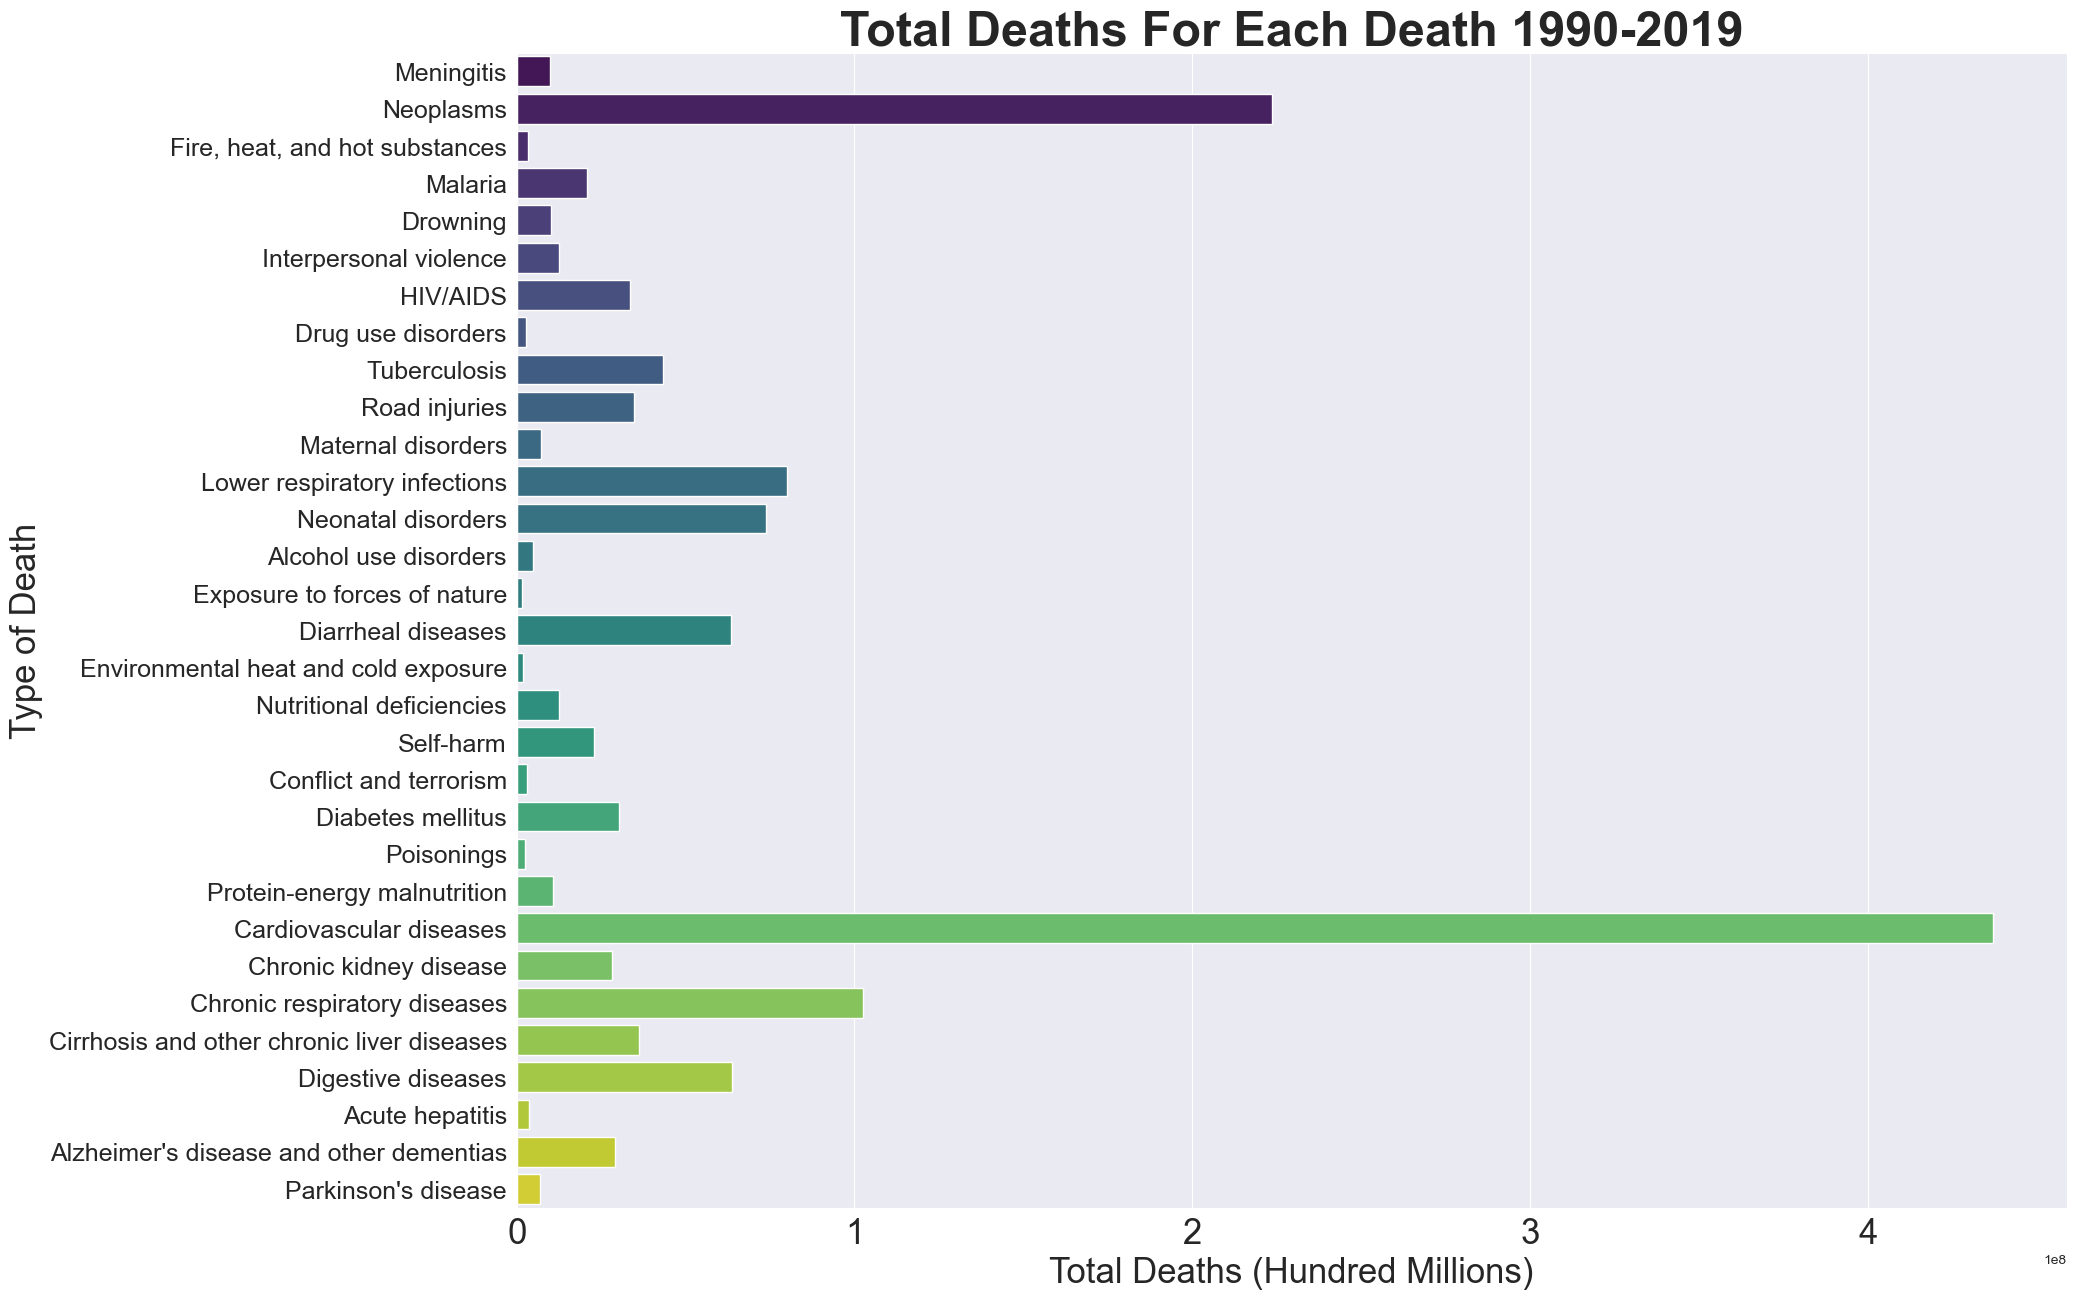

In [1787]:
# Here I visualize the total deaths in billions for every type of death between 1990-2019
# Cardiovascular and Neoplasms are very obvious outliers leading me to further investigate them for more specific trends

plt.figure(figsize = (20, 15), dpi = 100)
sns.barplot(data = df_death_table, x = 'Total Deaths', y = 'Type of Death', palette='viridis')
plt.yticks(ticks=df_death_table['Type of Death'].unique(), fontsize=18)
plt.xticks(fontsize=25)
plt.title('Total Deaths For Each Death 1990-2019', loc='center', fontsize=35, fontweight='bold')
plt.xlabel('Total Deaths (Hundred Millions)', fontsize=25)
plt.ylabel('Type of Death', fontsize=25)
plt.show()

## Total Deaths (1990-2019) Percent Visualization <a name="introduction"></a>

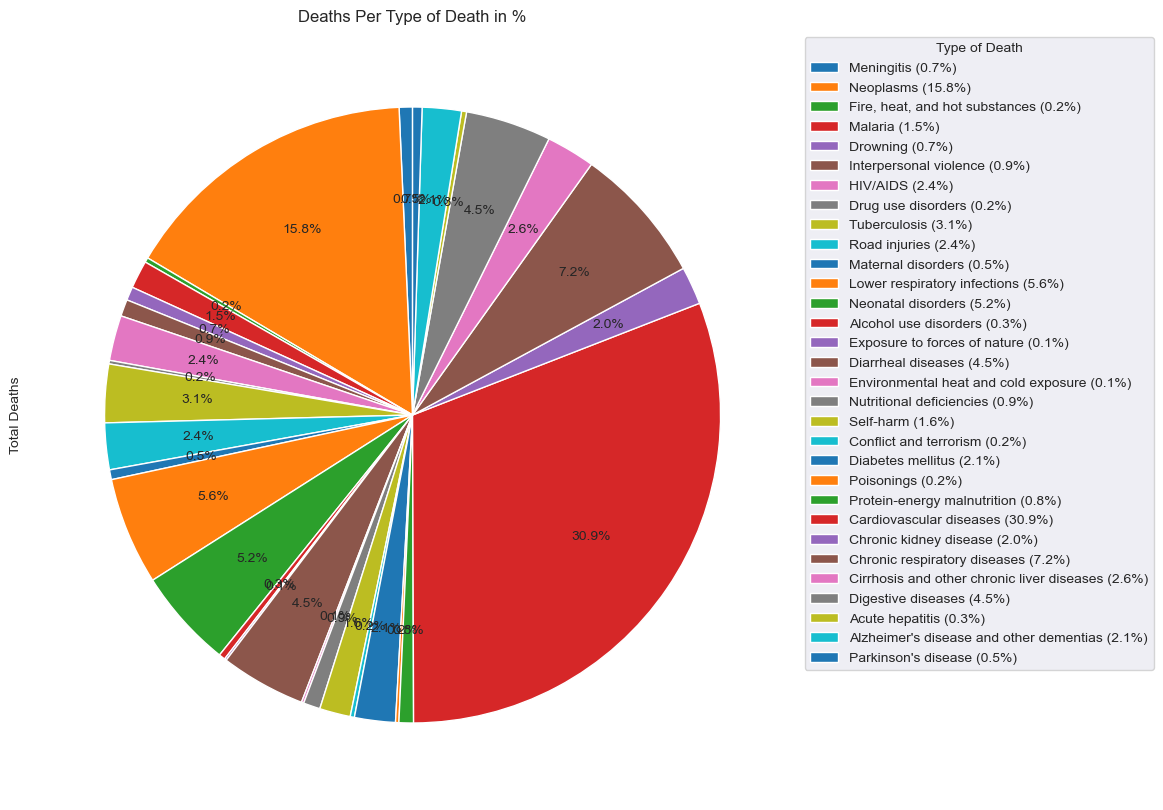

In [1789]:
# To further visualize I've plotted the total % for each type of death to show the disparity

percentages = df_death_table['Total Deaths'] / df_death_table['Total Deaths'].sum() * 100
fig, ax = plt.subplots(figsize=(10, 10))

df_death_table['Total Deaths'].plot.pie(
    labels = None,
    title = 'Deaths Per Type of Death in %', 
    autopct = '%1.1f%%',
    figsize = (10,10),
    startangle=90,  # Start angle for better orientation
    pctdistance=0.70)

ax.legend(
    labels=[
        f'{df_death_table["Type of Death"].iloc[i]} ({percentages.iloc[i]:.1f}%)'
        for i in range(len(df_death_table))
    ],
    title='Type of Death',
    loc='upper left',
    bbox_to_anchor=(1.0, 1.0)
)

plt.show()

## Choropleth Cardiovascular Diseases Visualization <a name="introduction"></a>

In [1651]:
# To further visualize the caridovascular I've used a geographical plot
# While it's clear higher population countries have higher likelihood, China (3.41M) and India(1.81M) are the clearest outliers here

In [1791]:
cardio = df[['Year', 'Entity','Deaths - Cardiovascular diseases']]

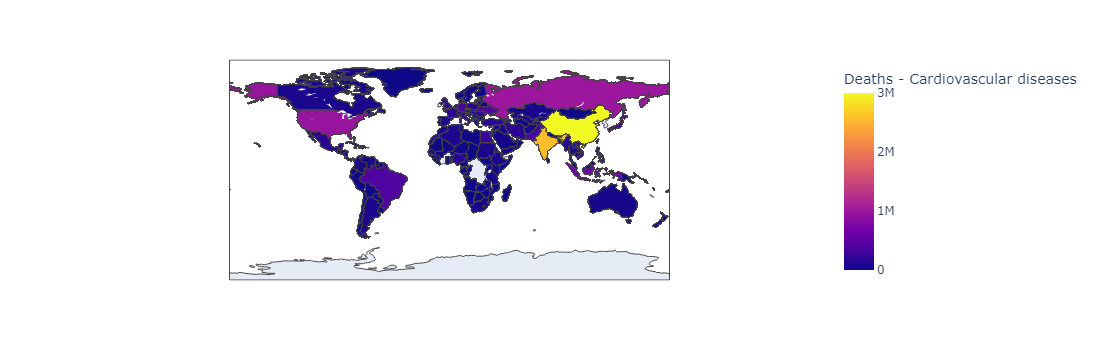

In [1793]:
px.choropleth(data_frame = cardio, 
              locations = 'Entity', locationmode = 'country names', 
              color = 'Deaths - Cardiovascular diseases', 
              color_continuous_scale=px.colors.sequential.Plasma,
              range_color=[0, 3000000])

## Choropleth Neoplasms Visualization <a name="introduction"></a>

In [1653]:
# Similarly neoplasms show the same trend 

In [1795]:
neoplasms = df[['Year', 'Entity','Deaths - Neoplasms']]

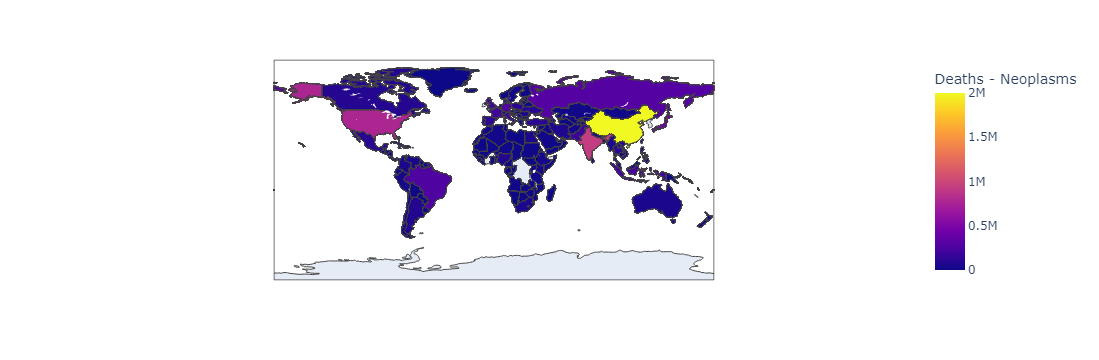

In [1797]:
px.choropleth(data_frame = neoplasms, 
              locations = 'Entity', locationmode = 'country names', 
              color = 'Deaths - Neoplasms', 
              color_continuous_scale=px.colors.sequential.Plasma,
              range_color=[0,2000000])

## Total Deaths Per Year DataFrame <a name="introduction"></a>

In [1854]:
# To visualize total death count by year I have created a new dataframe with the total death count among all deaths in every country by year

In [1799]:
df_years = df_world

In [1801]:
df_years['Sum'] = df_world.iloc[:,1:].sum(axis=1)

In [1803]:
df_years = df_world.loc[:,['Year', 'Sum']]

In [1809]:
df_years.head(30)

,Year,Sum
0,1990,42108896
1,1991,42618744
2,1992,42982419
3,1993,43676388
4,1994,44636985
5,1995,44396713
6,1996,44532680
7,1997,44883891
8,1998,45254677
9,1999,45814731


## Total Deaths Over Time Lineplot <a name="introduction"></a>

In [1659]:
# Visualizing the total deaths overall (100 millions) 
# We can see that the death count shows a mostly steady increase over time with a few outliers between 2007-2010

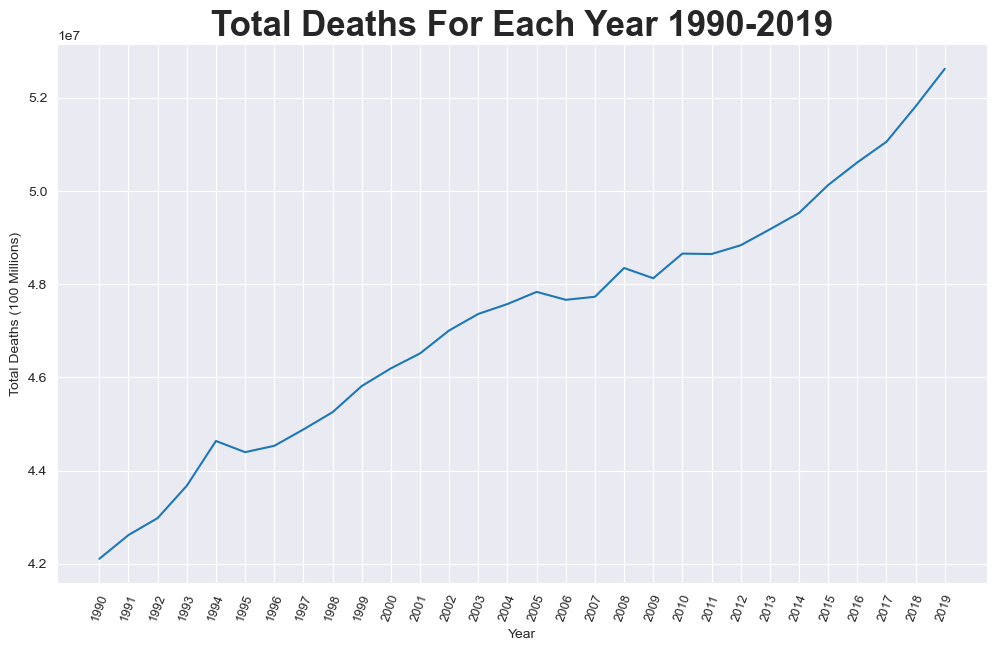

In [1811]:
plt.figure(figsize = (12, 7), dpi = 100)
sns.lineplot(data = df_years, x = 'Year', y = 'Sum')
plt.title('Total Deaths For Each Year 1990-2019', loc='center', fontsize=25, fontweight='bold')
plt.ylabel('Total Deaths (100 Millions)')
plt.xticks(ticks=df_years['Year'].unique(), fontsize=9, rotation=70)
plt.show()

## Cardiovascular Deaths Over Time Lineplot <a name="introduction"></a>

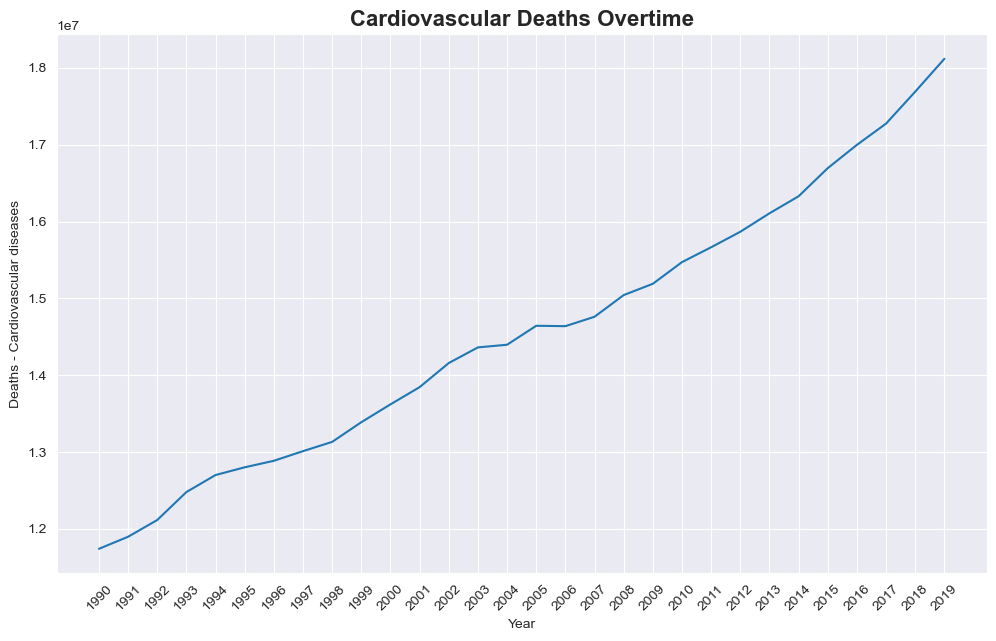

In [1813]:
# Similarly cardiovascular deaths show the same trends
plt.figure(figsize = (12, 7), dpi = 100)
sns.lineplot(data = df_world, x = 'Year', y = 'Deaths - Cardiovascular diseases')
plt.xticks(ticks=df_world['Year'].unique(), rotation=45)
plt.title('Cardiovascular Deaths Overtime', loc='center', fontsize=16, fontweight='bold')
plt.show()

## Countries Overall Death DataFrame  <a name="introduction"></a>

In [1833]:
# Next I take a look at the total overall deaths by country creating a dataframe with countries and their totals

In [1817]:
df_countries = df.drop(columns=['Year'], inplace=False)

In [1819]:
df_countries.head(10)

,Entity,Deaths - Meningitis,Deaths - Neoplasms,"Deaths - Fire, heat, and hot substances",Deaths - Malaria,Deaths - Drowning,Deaths - Interpersonal violence,Deaths - HIV/AIDS,Deaths - Drug use disorders,Deaths - Tuberculosis,Deaths - Road injuries,Deaths - Maternal disorders,Deaths - Lower respiratory infections,Deaths - Neonatal disorders,Deaths - Alcohol use disorders,Deaths - Exposure to forces of nature,Deaths - Diarrheal diseases,Deaths - Environmental heat and cold exposure,Deaths - Nutritional deficiencies,Deaths - Self-harm,Deaths - Conflict and terrorism,Deaths - Diabetes mellitus,Deaths - Poisonings,Deaths - Protein-energy malnutrition,Deaths - Cardiovascular diseases,Deaths - Chronic kidney disease,Deaths - Chronic respiratory diseases,Deaths - Cirrhosis and other chronic liver diseases,Deaths - Digestive diseases,Deaths - Acute hepatitis,Deaths - Alzheimer's disease and other dementias,Deaths - Parkinson's disease
0,Afghanistan,2933,15925,481,393,2127,3657,148,252,4995,7425,4990,27672,23890,111,296,9320,57,2488,1310,8220,3189,513,2439,53962,4490,7222,3346,6458,3437,1402,450
1,Afghanistan,2731,16148,462,255,1973,3785,157,261,4790,7355,5020,25800,23792,114,1317,8275,57,2277,1330,6895,3261,495,2231,54051,4534,7143,3316,6408,3005,1424,455
2,Afghanistan,2460,16383,448,239,1852,3874,167,270,4579,7290,5013,24340,23672,115,101,7359,57,2040,1342,7617,3336,483,1998,53964,4597,7045,3291,6358,2663,1449,460
3,Afghanistan,2327,17094,448,390,1775,4170,184,292,4259,7432,4857,22883,23951,120,83,6412,58,1846,1391,9142,3550,483,1805,54347,4785,6916,3318,6370,2365,1508,473
4,Afghanistan,2254,17522,445,94,1716,4245,191,305,4122,7494,4736,22162,24057,123,333,6008,103,1705,1413,11350,3682,482,1667,54868,4846,6878,3353,6398,2264,1544,482
5,Afghanistan,2281,18015,460,143,1777,4379,200,316,4047,8054,4623,22260,24234,126,155,5986,58,1690,1433,11829,3827,494,1651,55274,4945,6859,3413,6476,2204,1581,491
6,Afghanistan,1935,18462,463,228,1757,4420,213,326,3970,8087,4470,21750,24163,128,575,5751,57,1617,1444,18008,3986,496,1579,55932,5055,6851,3454,6522,2134,1620,502
7,Afghanistan,1821,18876,463,284,1730,5039,230,339,3893,7730,4320,21016,23953,131,446,5509,58,1505,1467,23667,4143,496,1469,56875,5153,6835,3492,6555,2065,1652,511
8,Afghanistan,1795,19459,471,388,1742,5033,251,354,3843,7866,4212,20601,23956,135,84,5376,58,1452,1505,28051,4349,504,1416,57970,5296,6894,3578,6673,2044,1690,524
9,Afghanistan,2159,11580,323,93,1370,1538,34,93,4661,4154,2655,23741,15612,72,0,4235,175,2087,696,1490,2108,338,2054,44899,3709,5945,2673,5005,2985,1116,371


In [1821]:
df_countries['Sum'] = df_countries.iloc[:, 1:].sum(axis=1)

In [1823]:
df_countries = df_countries.groupby('Entity').sum().reset_index()

In [1825]:
df_countries = df_countries.loc[:,['Entity', 'Sum']].sort_values(by='Sum', ascending = False)

In [1827]:
df_countries.head(30)

,Entity,Sum
32,China,265408107
71,India,238158165
169,United States,71197804
132,Russia,59591156
72,Indonesia,44046940
117,Nigeria,43670014
120,Pakistan,38151876
22,Brazil,32674113
78,Japan,31922803
58,Germany,25559668


## Total Deaths By Country Choropleth Visualization <a name="introduction"></a>

In [1835]:
# Once again I map the death counts using a choropleth to view the total death count by geographical location

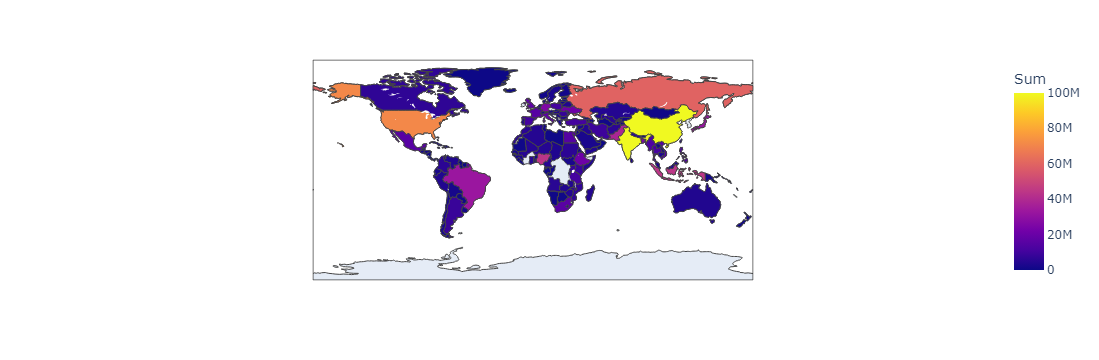

In [1831]:
px.choropleth(data_frame = df_countries, 
              locations = 'Entity', locationmode = 'country names', 
              color = 'Sum', 
              color_continuous_scale=px.colors.sequential.Plasma,
              range_color=[0,100000000])